In [ ]:
#import neccessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the dataset
review = pd.read_csv('/content/TeePublic_review.csv' , encoding='latin-1',)
review.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5.0
1,1,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5.0
2,2,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5.0
3,3,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5.0
4,4,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4.0


In [ ]:
#get more information about the dataset
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166400 entries, 0 to 166399
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_id     166400 non-null  int64  
 1   store_location  166400 non-null  object 
 2   latitude        166400 non-null  float64
 3   longitude       166400 non-null  float64
 4   date            166400 non-null  int64  
 5   month           166400 non-null  int64  
 6   year            166399 non-null  object 
 7   title           166392 non-null  object 
 8   review          148250 non-null  object 
 9   review-label    166399 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 12.7+ MB


In [ ]:
#check for missing values
review.isnull().sum()

reviewer_id           0
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  1
title                 8
review            18150
review-label          1
dtype: int64

In [ ]:
#drop missing value in the review-label column
review.dropna(subset=["title", 'review-label'], inplace=True)


In [ ]:
#fill the missing values in the review column
review = review.fillna('No Review')
#display the result
review[review['review'].str.contains('No Review')]

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
121,121,US,37.090240,-95.712891,2023,6,2024 00:00:00,Awesome t-shirt love it vintage ï¿½ï¿½ï¿½ï¿½,No Review,5.0
128,128,US,37.090240,-95.712891,2023,6,2018 00:00:00,Nice tee quick delivery -,No Review,5.0
130,130,US,37.090240,-95.712891,2023,6,2023 00:00:00,Big selections lots to choose from,No Review,5.0
142,142,US,37.090240,-95.712891,2023,6,2024 00:00:00,Great company,No Review,5.0
146,146,CA,56.130366,-106.346771,2023,6,2024 00:00:00,Great as always!,No Review,5.0
...,...,...,...,...,...,...,...,...,...,...
166340,166340,US,37.090240,-95.712891,2021,1,2005 00:00:00,Seemed like good quality material,No Review,5.0
166376,166376,US,37.090240,-95.712891,2021,1,2005 00:00:00,loved itttt and true to size and,No Review,5.0
166379,166379,US,37.090240,-95.712891,2021,1,2005 00:00:00,Grandkids loved the t-shirts,No Review,5.0
166392,166392,US,37.090240,-95.712891,2021,1,2005 00:00:00,Great quality and true to size,No Review,5.0


In [ ]:
#check for duplicates
review.duplicated().sum()

0

In [ ]:
review['title'] = review['title'].str.replace('ï¿½', '')
review['review'] = review['review'].str.replace('ï¿½', '')
review.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5.0
1,1,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and had,I ordered the wrong size tee and had difficult...,5.0
2,2,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customer,These guys offer the best customer service in ...,5.0
3,3,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5.0
4,4,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timely,My order arrived in a good timely fashion & th...,4.0


In [ ]:
#get the distribution of the rating
review['review-label'].value_counts()

review-label
5.0    130042
4.0     12584
1.0      9600
3.0      8515
2.0      5651
Name: count, dtype: int64

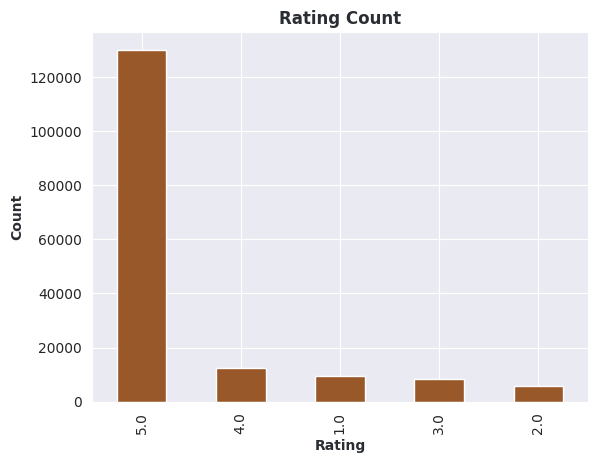

In [ ]:
#plot the distribution of the rating
sns.set_style('darkgrid')
review['review-label'].value_counts().plot(kind='bar', color='#99582A')
plt.ylabel('Count', **{'weight':'bold', 'color':'#2a2e33'})
plt.xlabel('Rating', **{'weight':'bold', 'color':'#2a2e33'})
plt.title('Rating Count', **{'weight':'bold', 'color':'#2a2e33'})
plt.show()

In [ ]:
round(review['review-label'].value_counts(normalize=True) * 100, 1)

review-label
5.0    78.2
4.0     7.6
1.0     5.8
3.0     5.1
2.0     3.4
Name: proportion, dtype: float64

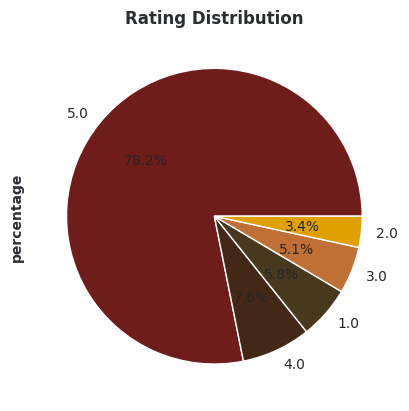

In [ ]:
#use pie chart to visualise the percentage of the rating distribution
color=['#6F1D1B', '#432818','#48381E','#C06F35','#E0A100']
review['review-label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=color)
plt.title('Rating Distribution', **{'weight':'bold', 'color':'#2a2e33'})
plt.ylabel('percentage',**{'weight':'bold', 'color':'#2a2e33'} )
plt.show()

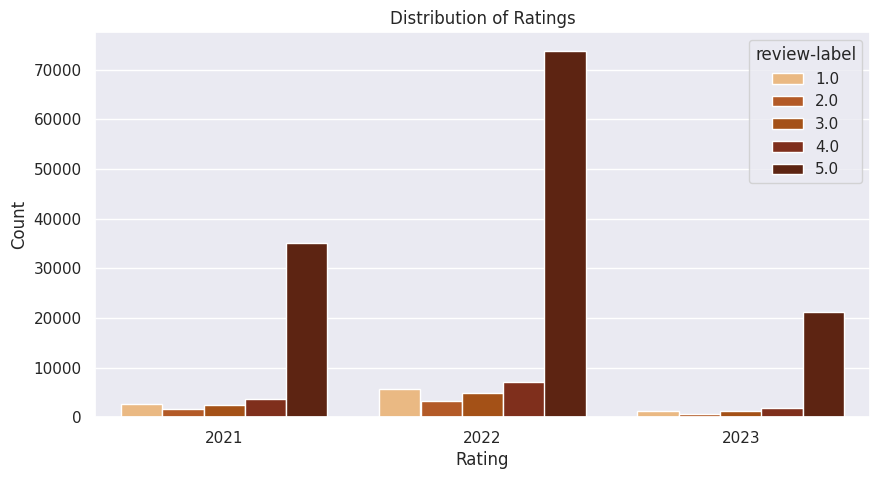

In [ ]:
#visualise the rating distribution for each year
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
palettes=['#FBBA72','#CA5310','#BB4D00','#8F250C','#691E06']
sns.countplot(data=review, x='date',hue='review-label', palette=palettes)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# length of the review texts
review['review_length'] = review['review'].apply(str).apply(len)

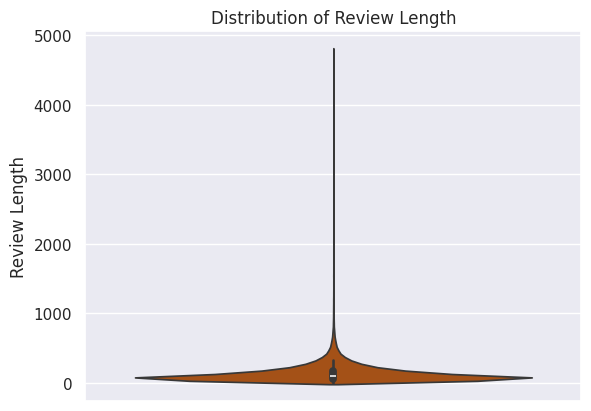

In [ ]:
sns.violinplot(review['review_length'], color='#BB4D00')
plt.title('Distribution of Review Length')
plt.ylabel('Review Length')
plt.show()


In [ ]:
#write function to evaluate the sentiment for each review
def evaluate_sentiment(review, pos_threshold=0.1, neg_threshold=-0.1):
    # Create a TextBlob object
    blob = TextBlob(review)
    # Get the sentiment polarity
    polarity = blob.sentiment.polarity

    # Classify the sentiment
    if polarity > pos_threshold:
        sentiment = 'Positive'
    elif polarity < neg_threshold:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    return sentiment

# Example
review_text = "Seemed like good quality material"
print(evaluate_sentiment(review_text))


Positive


In [ ]:
#include the sentiment column to the dataset
review['sentiments']=review['review'].apply(evaluate_sentiment)
review.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label,review_length,sentiments
0,0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5.0,169,Positive
1,1,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and had,I ordered the wrong size tee and had difficult...,5.0,235,Positive
2,2,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customer,These guys offer the best customer service in ...,5.0,161,Positive
3,3,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5.0,191,Positive
4,4,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timely,My order arrived in a good timely fashion & th...,4.0,314,Positive


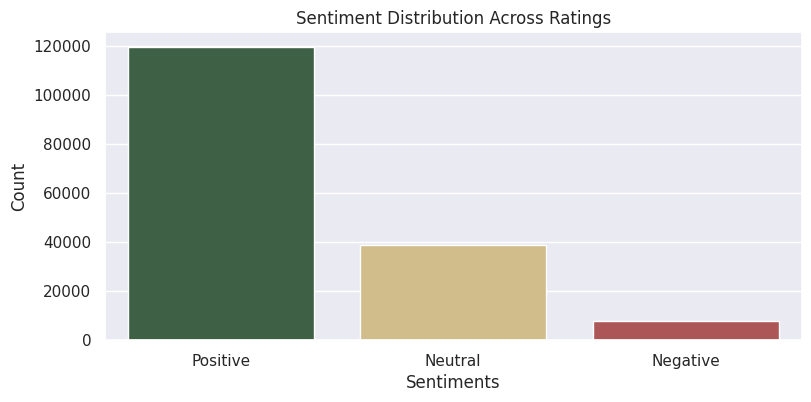

In [ ]:
#visualise the sentiment distribution
plt.figure(figsize=(9, 4))
color=['#386641','#DCC27F','#BC4749']
sns.countplot(data=review, x='sentiments', palette=color)
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

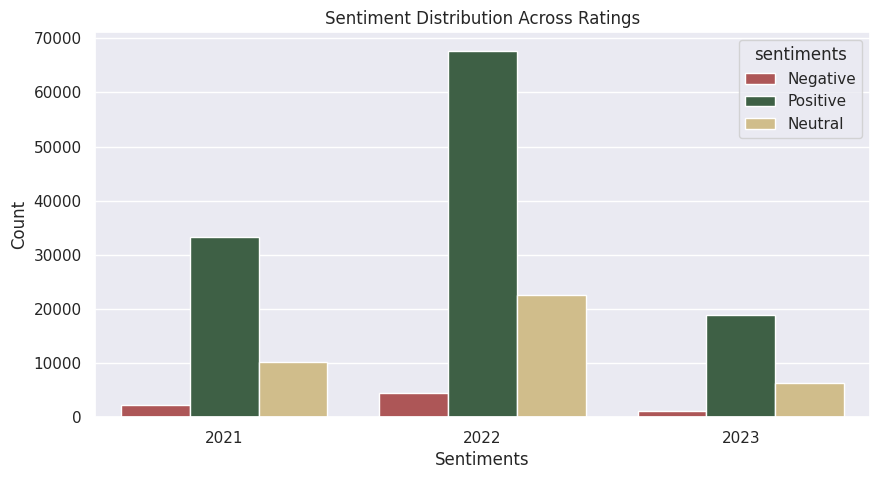

In [ ]:
#plot the sentiments for each year
plt.figure(figsize=(10, 5))
color=['#BC4749','#386641','#DCC27F']
sns.countplot(data=review, x='date', hue='sentiments', palette=color)
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()


In [ ]:
#visualise the review texts using wordcloud
def generate_word_cloud(sentiment):
 SelectedOne=review[review['sentiments']==sentiment]
 text = ' '.join(str(review) for review in SelectedOne['review'])
 wordcloud = WordCloud(width=800, height=400).generate(text)
 plt.figure(figsize=(10, 5))
 plt.imshow(wordcloud, interpolation='bilinear')
 plt.title('Word Cloud for '+ sentiment+ ' Reviews')
 plt.axis('off')
 plt.show()

In [ ]:
def generate_word_cloud(sentiment):
    # Filter reviews based on sentiment
    filtered_reviews = review[review['sentiments'] == sentiment]

    # Concatenate review texts into a single string
    concatenated_text = ' '.join(filtered_reviews['review'].astype(str))

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400).generate(concatenated_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

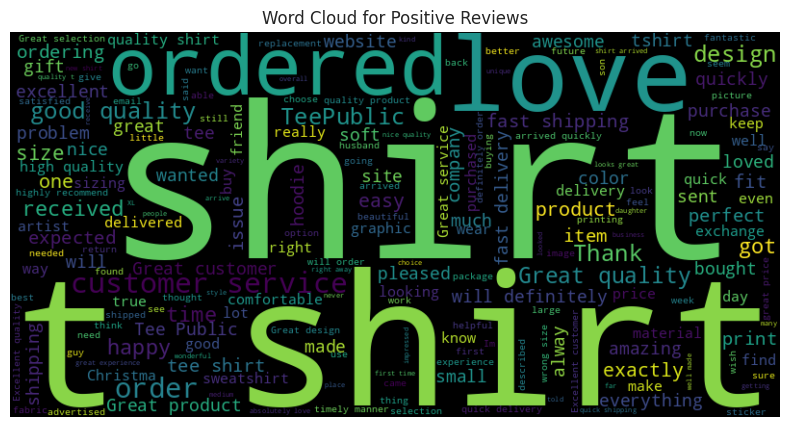

In [ ]:
generate_word_cloud('Positive')

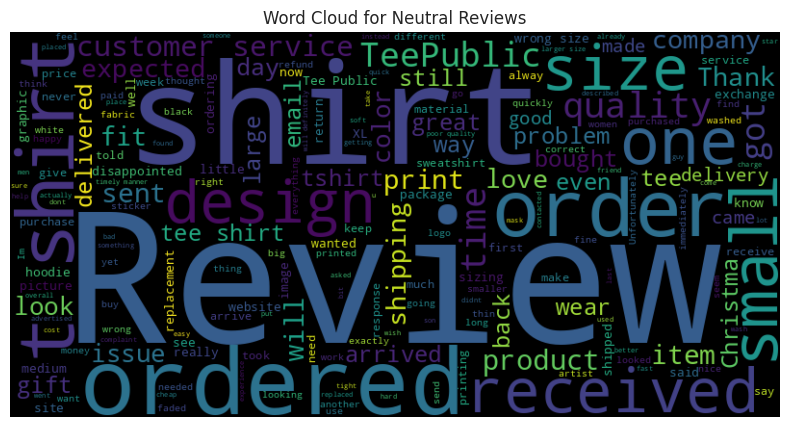

In [ ]:
generate_word_cloud('Neutral')

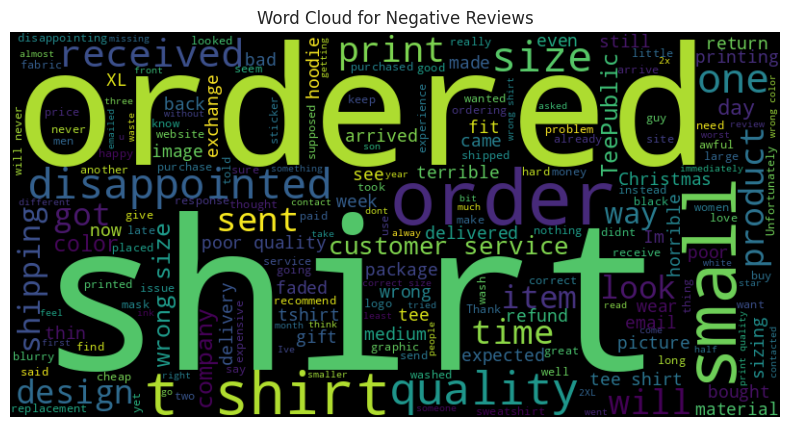

In [ ]:
generate_word_cloud('Negative')